TABLE OF CONTENTS

I -
   - Problem / Data Set Information
   - Importing Libraries
   - Loading Data / Exploratory Data Analysis
   - Correlation between Numeric Variable
   - Relationship between categorical variables and target variable by using chi-square test
   - Visualization
   - Checking missing values in the Dataset
   - Handling missing values
   - Convert Categorical variables into Numerical

II -  Random forest
   - Train Test Split
   - Feature Scaling 
   - Entrainement du modèle
   - Evaluation du modele
   - Evaluation avec d'autres métriques
   - Matrice de confusion
   - Visualisation de l'arbre de décision
   - Tracé de l'importance des features

III -  Decision tree
   - Entrainement du modèle
   - Evaluation du modele
   - Evaluation avec d'autres métriques
   - Matrice de confusion
   - Tracé de l'importance des features

IV - Adaboost
   - Entrainement du modèle
   - Evaluation du modele
   - Evaluation avec d'autres métriques
   - Matrice de confusion
   - Tracé de l'importance des features

V -  XGBoost Classifier
  - Entrainement du modele
  - Evaluation du modele
  - Matrice de confusion
  - Tracé de l'importance des features

VI - Comparaison des performances

# I - 

### Problem / Data Set Information

Prédire avec random forest classifier, decision tree classifier, adaboost, xgboost le cancer diagnostiqué chez un patient est  un "malignant cancer"(M) ou un "benign cancer"(B).


Le dataset comporte 569 observations pour 32 colonnes.

La variable à expliquer est Diagnosis (M = malignant, B = benign).

Les attributs non exhausifs du dataset:

1) ID number
2) Diagnosis (M = malignant, B = benign)

  Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

...

### Importing Libraries

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import category_encoders as ce

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.inspection import permutation_importance

# Stats
from scipy import stats
from scipy.stats import chi2_contingency

# Others
import warnings  
warnings.filterwarnings('ignore')

### Loading Data / Exploratory Data Analysis

In [2]:
# Load data 
data = pd.read_csv('data.csv')

# Drop useless column
data.drop(['Unnamed: 32'], axis=1, inplace=True)

# Affichage des 5 premieres lignes du data train
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Nombre de lignes et de colonnes des data
data.shape

(569, 32)

In [4]:
# Noms des attributs
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
# Types des variables
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
# Infos sur le dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Répartition des observations
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

- 62.74% des observations du dataset ont été diagnostiquées comme porteur du "benign cancer" (B).
- 32.26% restant comme porteur du "malignant cancer" (M).

In [8]:
# Basic statistics on numeric features 
data.drop(['id'], axis = 1, inplace = False).describe() # drop target column ('id')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Correlation between Numeric Variable

Let's find correlation between Numeric Variable

In [9]:
# New dataframe to calculate correlation between numeric features
corr_df = data.drop(['id'], axis=1, inplace=False)
#cor= corr_df.corr(method='pearson')
#print(cor)

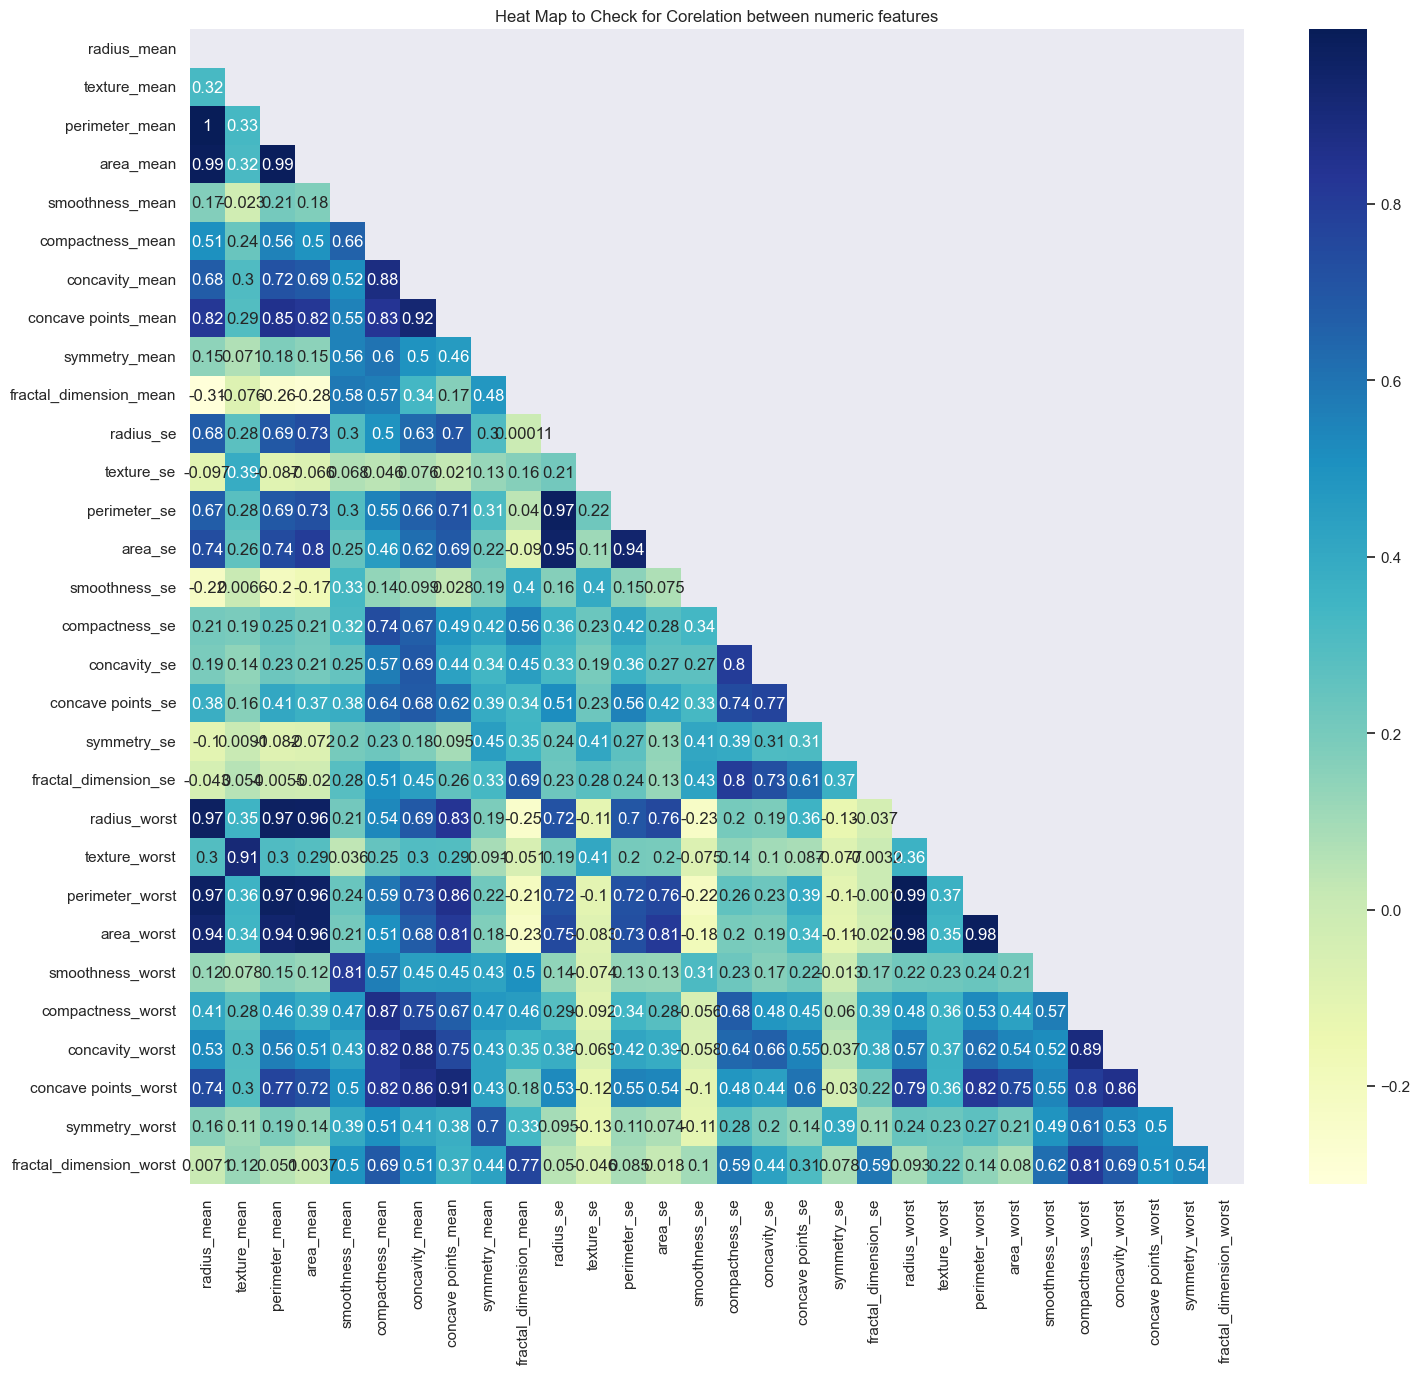

In [10]:
# Heat Map to Check for Corelation between numeric features
plt.figure(figsize=(17, 15)) # Augmenter figsize en cas de problème de visualisation
mask = np.triu(np.ones_like(corr_df.corr(method='pearson')))
sns.set(rc = {'figure.figsize':(26, 24)})
sns.heatmap(corr_df.corr(method='pearson'), cmap="YlGnBu", annot=True, mask=mask)
plt.title("Heat Map to Check for Corelation between numeric features");


In [11]:
# Moyenne de chaque variable explicative calculée dans chaque classe
m = data.drop(['id'], axis=1, inplace=False).groupby('diagnosis').mean()
m

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


### Relationship between categorical variables and target variable by using chi-square test

No categorical variables

### Visualization

In [12]:
# L'écart absolu des moyennes intra classe dans chaque variable explicative
ecart_moyenne = pd.DataFrame({'features':m.columns, 'ecart moyenne':abs(m.iloc[0,:] - m.iloc[1,:]).values})
ecart_moyenne.sort_values('ecart moyenne', ascending=False, inplace=True)
ecart_moyenne

,features,ecart moyenne
23,area_worst,863.386881
3,area_mean,515.586219
22,perimeter_worst,54.364392
13,area_se,51.537257
2,perimeter_mean,37.289971
20,radius_worst,7.755010
21,texture_worst,5.803138
0,radius_mean,5.316306
1,texture_mean,3.690144
12,perimeter_se,2.323608


Le calcul de l'écart absolu des moyennes intra classe sur chaque variable explicative mesure la différence de dispersion de celle ci sur les deux classes. 

Ci-dessous est une visualisation de quelques features :

First let's check the impact of feature area_worst on diagnosis

Text(0.5, 1.0, 'Impact of area_worst on diagnosis')

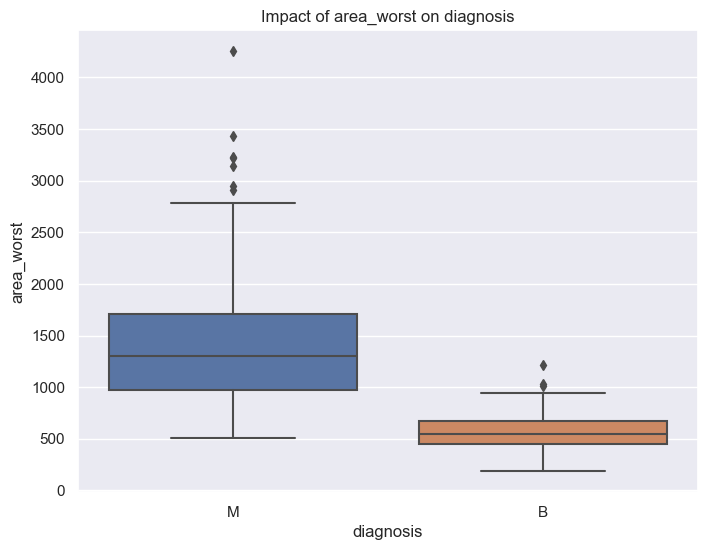

In [13]:
fig, ax=plt.subplots(figsize=(8,6))
#plt.figure()
sns.boxplot(x=data.diagnosis, y=data.area_worst)
plt.title('Impact of area_worst on diagnosis')


Les patients diagnostiqués du "benign cancer" (B) ont leur valeur de area_worst plus faible que ceux diagnostiqués du "malignant cancer" (M).

Text(0.5, 1.0, 'Impact of area_mean on diagnosis')

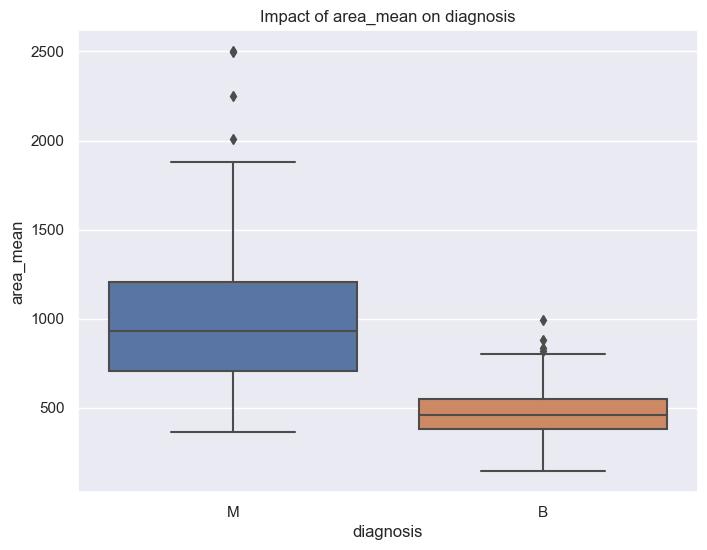

In [14]:
fig, ax=plt.subplots(figsize=(8,6))
#plt.figure()
sns.boxplot(x=data.diagnosis, y=data.area_mean)
plt.title('Impact of area_mean on diagnosis')

Les patients diagnostiqués du "benign cancer" (B) ont leur valeur de area_mean plus faible que ceux diagnostiqués du "malignant cancer" (M).

Text(0.5, 1.0, 'Impact of perimeter_worst on diagnosis')

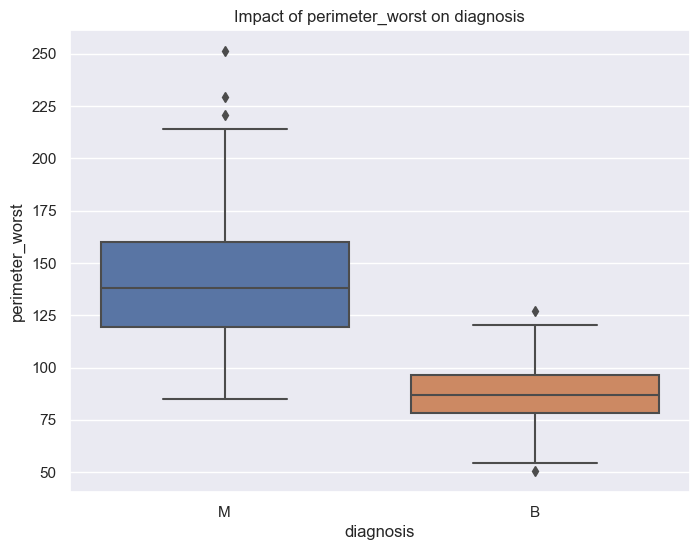

In [15]:
fig, ax=plt.subplots(figsize=(8,6))
#plt.figure()
sns.boxplot(x=data.diagnosis, y=data.perimeter_worst)
plt.title('Impact of perimeter_worst on diagnosis')

Les patients diagnostiqués du "benign cancer" (B) ont leur valeur de perimeter_worst plus faible que ceux diagnostiqués du "malignant cancer" (M).

Text(0.5, 1.0, 'Impact of area_se on diagnosis')

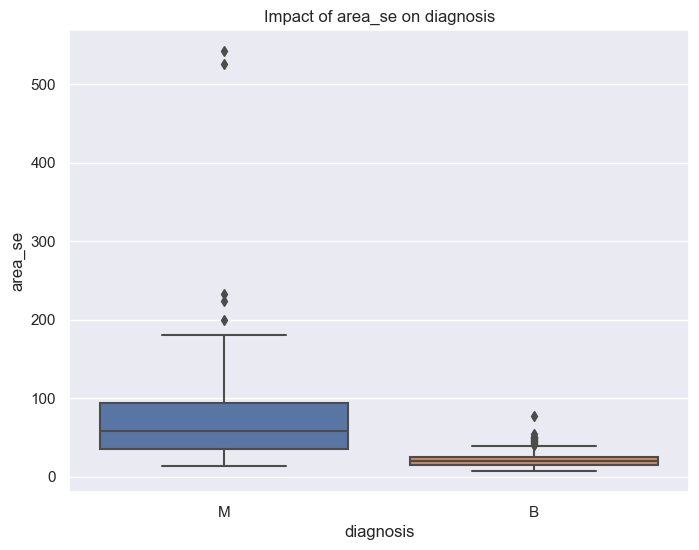

In [16]:
fig, ax=plt.subplots(figsize=(8,6))
#plt.figure()
sns.boxplot(x=data.diagnosis, y=data.area_se)
plt.title('Impact of area_se on diagnosis')

Les patients diagnostiqués du "benign cancer" (B) ont leur valeur de area_se plus faible que ceux diagnostiqués du "malignant cancer" (M).

Text(0.5, 1.0, 'Impact of perimeter_mean on diagnosis')

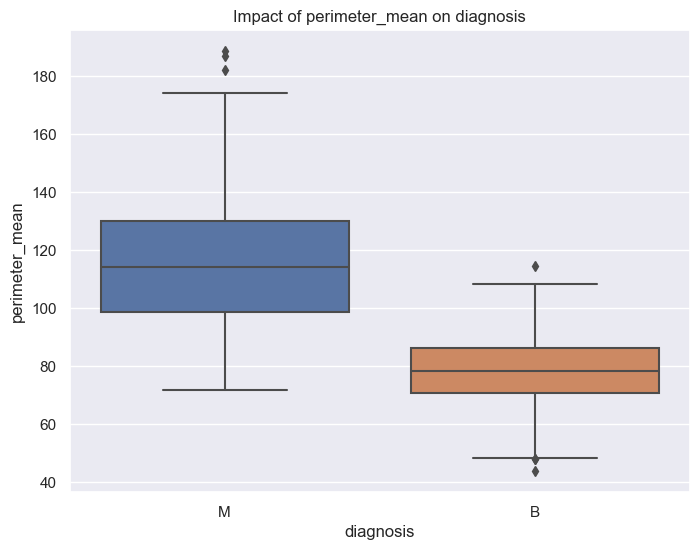

In [17]:
fig, ax=plt.subplots(figsize=(8,6))
#plt.figure()
sns.boxplot(x=data.diagnosis, y=data.perimeter_mean)
plt.title('Impact of perimeter_mean on diagnosis')

Text(0.5, 1.0, 'Impact of radius_worst on diagnosis')

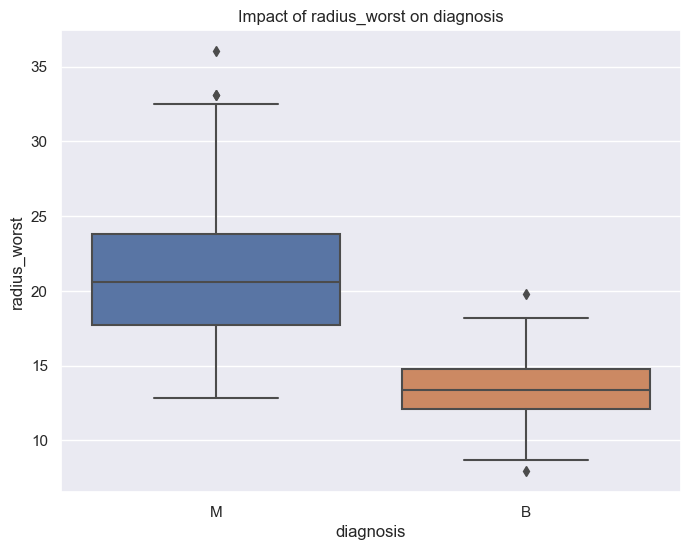

In [18]:
fig, ax=plt.subplots(figsize=(8,6))
# plt.figure()
sns.boxplot(x=data.diagnosis, y=data.radius_worst)
plt.title('Impact of radius_worst on diagnosis')

Les patients diagnostiqués du "benign cancer" (B) ont leur valeur de radius_worst plus faible que ceux diagnostiqués du "malignant cancer" (M).

Text(0.5, 1.0, 'Impact of symmetry_se on diagnosis')

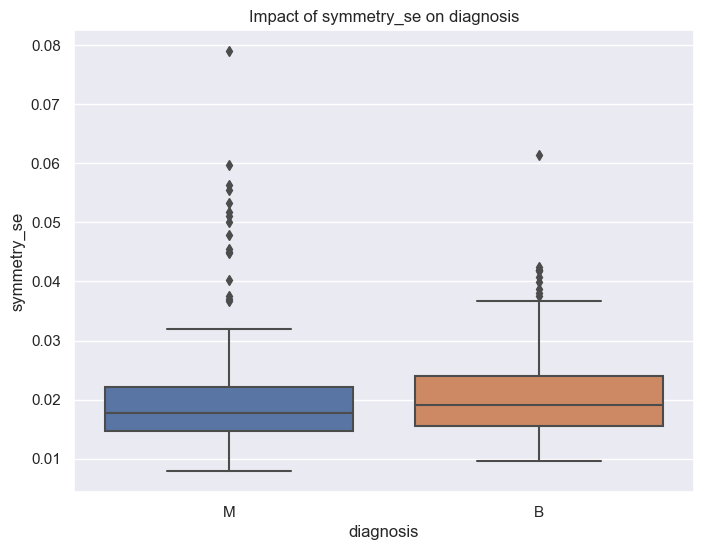

In [19]:
fig, ax=plt.subplots(figsize=(8,6))
#plt.figure()
sns.boxplot(x=data.diagnosis, y=data.symmetry_se)
plt.title('Impact of symmetry_se on diagnosis')

Les patients diagnostiqués du "benign cancer" (B) ont leur valeur de symmetry_se légèrement plus élevée que ceux diagnostiqués du "malignant cancer" (M).

### Checking missing values in the Dataset

In [20]:
# Let's check which features contain missing values
pd.isnull(data).sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No variable has a missing value

### Handling Missing Values

Empty part

### Convert Categorical variables into Numerical

No categorical variables

# II -  Random forest

#### Train Test Split

In [21]:
X = data.drop(['diagnosis', 'id'], axis = 1, inplace = False)
y = data['diagnosis']

# Data train (X_train, y_train) and data test (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 123)

#### Feature Scaling 

Empty part

###  Entrainement du modele

In [144]:
# Hyperparameter Tuning
    # Remarque : This code takes runs in a long time
# parameters we are fine tuning
param_grid = { 
    'n_estimators': [100, 400, 700, 1000], #, 1300], # On pourrait utiliser np.arange() pour plus de valeurs
    #"bootstrap": [True, False],
    "min_samples_leaf" : [1, 5, 10, 25], #, 50, 70],  # On pourrait utiliser np.arange() pour plus de valeurs
    "min_samples_split" : [2, 4, 10], # 12, 16, 18, 25, 35], # On pourrait utiliser np.arange() pour plus de valeurs
    'max_features': ['auto', 'sqrt'], #'log2'],
    'max_depth' : [2, 3, 4], # 5,  6], # On pourrait utiliser np.arange() pour plus de valeurs
    'criterion' :['gini'] #, 'entropy']
}

rfc=RandomForestClassifier(random_state=42, bootstrap=True, n_jobs=-1)

# Grid Search to Search through all the combination of values
CV_rfc = GridSearchCV(
    estimator=rfc, 
    param_grid=param_grid, 
    scoring='accuracy', # scoring = ['roc_auc', 'precision', 'f1', ...], il calcule l'accuracy
    error_score='raise', # il calcule l'erreur du cv. Il est différent de OOB error
    return_train_score=False,
    cv=5,
    verbose = 2,
    n_jobs=-1
)

In [145]:
# Entrainement du modèle
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 5, 10, 25],
                         'min_samples_split': [2, 4, 10],
                         'n_estimators': [100, 400, 700, 1000]},
             scoring='accuracy', verbose=2)

In [204]:
# To view all the parameters used
CV_rfc.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 5, 10, 25],
                         'min_samples_split': [2, 4, 10],
                         'n_estimators': [100, 400, 700, 1000]},
             scoring='accuracy', verbose=2)>

In [205]:
# We can view the best parameters from fitting the grid search:
print(CV_rfc.best_params_) 

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}


In [ ]:
# print(CV_rfc.best_score_) 
# print(CV_rfc.cv_results_)

###  Evaluation du modele

In [22]:
# Now let's run the model with this parameters
random_forest = RandomForestClassifier(
    n_estimators=700,
    criterion='gini',
    bootstrap=True,
    oob_score=True,
    random_state=123,
    max_depth=4,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=2,
    n_jobs=-1
)

random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_test)


print("Accuracy random forest (data test): {:0.2f}%.".format(accuracy_score(y_test, y_predict) * 100))

print("oob score: {:0.2f}%.".format(random_forest.oob_score_ * 100))

Accuracy random forest (data test): 95.91%.
oob score: 95.98%.


### Evaluation avec d'autres métriques

In [23]:
#roc = roc_auc_score(y_test, y_predict)
acc_random_forest = accuracy_score(y_test, y_predict)
prec_random_forest = precision_score(y_test, y_predict, pos_label='M')
rec_random_forest = recall_score(y_test, y_predict, pos_label='M')
f1_random_forest = f1_score(y_test, y_predict, pos_label='M')

model_results_random_forest = pd.DataFrame([['Random Forest', acc_random_forest, prec_random_forest, rec_random_forest, f1_random_forest]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results_random_forest

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.959064,0.925373,0.96875,0.946565


### Matrice de confusion


[[102   5]
 [  2  62]]


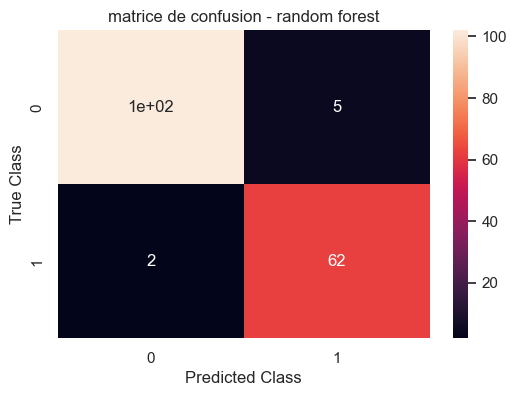

In [24]:
matrix = confusion_matrix(y_test, y_predict)
print(matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True)
plt.title('matrice de confusion - random forest')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
#sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')

### Tracé de l'importance des features

In [25]:
# Dataframe Features importances
df_feat = pd.DataFrame({'Features' : X_train.columns,
             'Features_importances' : random_forest.feature_importances_})

df_feat.sort_values(by=['Features_importances'], ascending=False, inplace=True)
df_feat

,Features,Features_importances
27,concave points_worst,0.165084
22,perimeter_worst,0.152306
23,area_worst,0.098233
7,concave points_mean,0.087432
20,radius_worst,0.079846
6,concavity_mean,0.062790
13,area_se,0.051415
26,concavity_worst,0.045872
3,area_mean,0.043471
2,perimeter_mean,0.039662


Text(0, 0.5, 'Feature names')

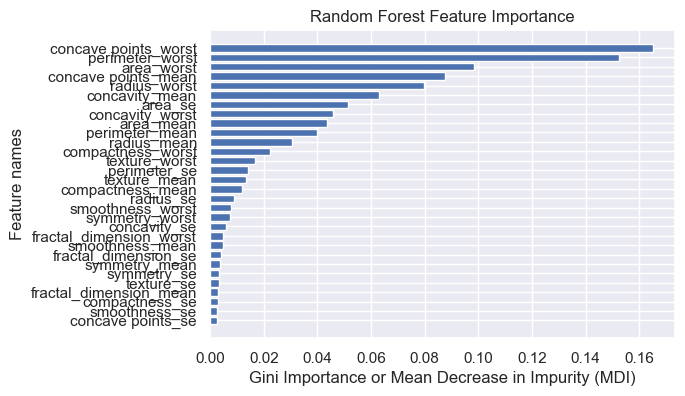

In [26]:
# Plot Features_importances' (Gini importance)
  # Note :Gini importance Mean Decrease in Impurity (MDI) counts the times a feature is used to split a node,
  # weighted by the number of samples it splits
df_feat.sort_values(by='Features_importances', ascending=True, inplace=True)
plt.figure(figsize=(6, 4))
plt.barh(df_feat['Features'], df_feat['Features_importances'])
plt.title("Random Forest Feature Importance")
plt.xlabel('Gini Importance or Mean Decrease in Impurity (MDI)')
plt.ylabel('Feature names')

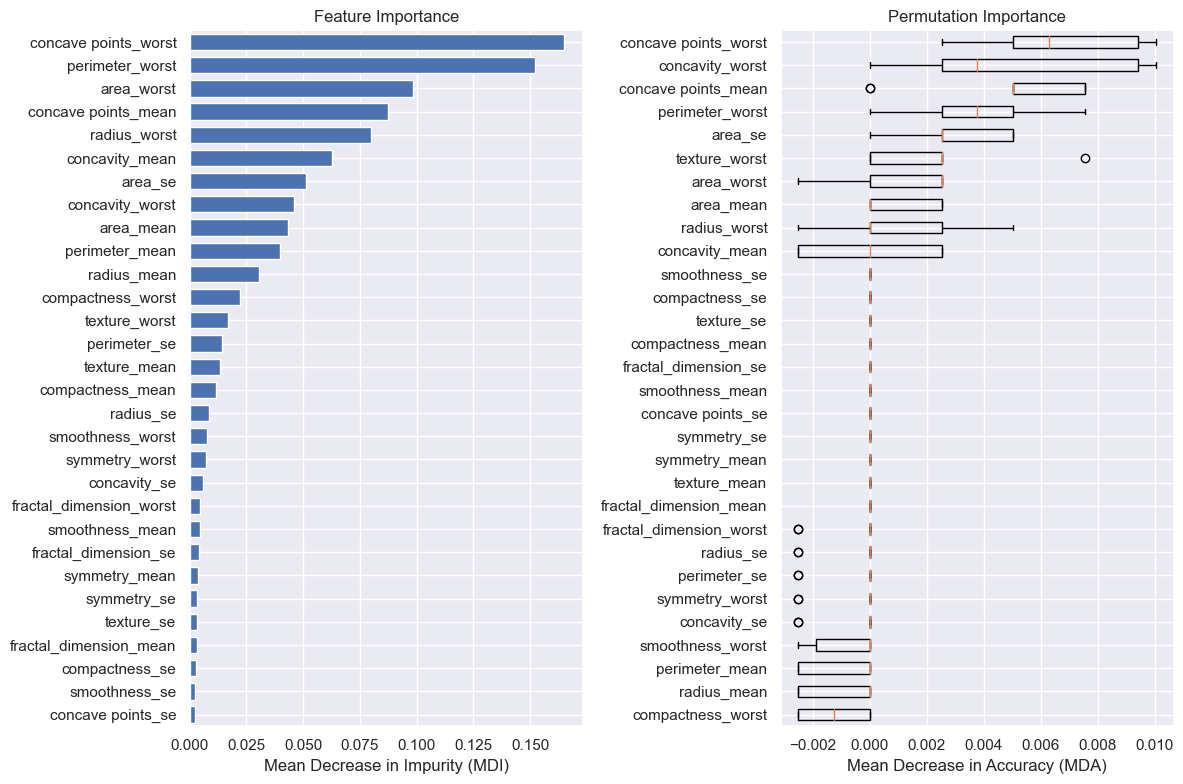

In [27]:
# Feature Importance (MDI) vs Generate Permutation Importance plot
result = permutation_importance(random_forest, X_train, y_train, n_repeats=10, random_state=42)
# n_repeats : Number of times to permute a feature.
perm_sorted_idx = result.importances_mean.argsort()

rdf_importance_sorted_idx = np.argsort(random_forest.feature_importances_)
rdf_indices = np.arange(0, len(random_forest.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(rdf_indices, random_forest.feature_importances_[rdf_importance_sorted_idx], height=0.7)
ax1.set_yticks(rdf_indices)
ax1.set_yticklabels(X_train.columns[rdf_importance_sorted_idx])
ax1.set_ylim((0, len(random_forest.feature_importances_)))
ax1.set_xlabel('Mean Decrease in Impurity (MDI)')
ax1.set_title('Feature Importance')

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_train.columns[perm_sorted_idx])
ax2.set_xlabel('Mean Decrease in Accuracy (MDA)')
ax2.set_title('Permutation Importance')

fig.tight_layout()
plt.show()

# II -  Decision tree

###  Entrainement du modele

In [209]:
# Hyperparameter Tuning
    # Remarque : This code takes runs in a long time
# parameters we are fine tuning
param_grid = { 
    "min_samples_leaf" : [1, 5, 10, 25, 50, 70],  # On pourrait utiliser np.arange() pour plus de valeurs
    "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], # On pourrait utiliser np.arange() pour plus de valeurs
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5, 6, 7, 8], # On pourrait utiliser np.arange() pour plus de valeurs
    'criterion' :['gini', 'entropy']
}

dtc=DecisionTreeClassifier(random_state=42, splitter='best')

# Grid Search to Search through all the combination of values
CV_dtc = GridSearchCV(
    estimator=dtc, 
    param_grid=param_grid, 
    scoring='accuracy', # scoring = ['roc_auc', 'precision', 'f1', ...], il calcule l'accuracy
    error_score='raise', # il calcule l'erreur du cv. Il est différent de OOB error
    return_train_score=False,
    cv=5,
    verbose = 2,
    n_jobs=-1
)

In [210]:
# Entrainement du modèle
CV_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35]},
             scoring='accuracy', verbose=2)

In [211]:
# To view all the parameters used
CV_dtc.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35]},
             scoring='accuracy', verbose=2)>

In [212]:
# We can view the best parameters from fitting the grid search:
print(CV_dtc.best_params_) 

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [ ]:
# print(CV_rfc.best_score_)
# print(CV_rfc.cv_results_)

###  Evaluation du modele

In [28]:
# Now let's run the model with this parameters
model_tree = DecisionTreeClassifier(
    criterion='entropy',
    random_state=123,
    max_depth=6,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=10
)
# Entrainement du modèle d'arbre avec les meilleurs paramètres 
model_tree.fit(X_train, y_train)
# Prédiction avec les données test
y_predict2 = model_tree.predict(X_test)

# Calcul du score du modèle 
print("Accuracy decision tree (data test): {:0.2f}%.".format(accuracy_score(y_test, y_predict2) * 100))

Accuracy decision tree (data test): 93.57%.


### Evaluation avec d'autres métriques

In [29]:
# roc = roc_auc_score(y_test, y_predict2, pos_label='M')
acc_decision_tree = accuracy_score(y_test, y_predict2)
prec_decision_tree = precision_score(y_test, y_predict2, pos_label='M')
rec_decision_tree = recall_score(y_test, y_predict2, pos_label='M')
f1_decision_tree = f1_score(y_test, y_predict2, pos_label='M')

model_results_decision_tree = pd.DataFrame([['Decision tree', acc_decision_tree, prec_decision_tree, rec_decision_tree, f1_decision_tree]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results_decision_tree

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.935673,0.884058,0.953125,0.917293


### Matrice de confusion

[[102   5]
 [  2  62]]


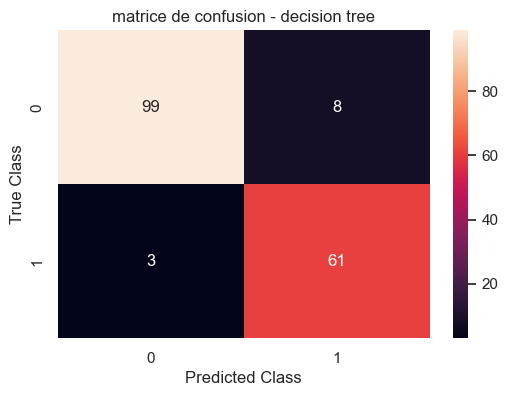

In [30]:
matrix_decision_tree = confusion_matrix(y_test, y_predict2)
print(matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_decision_tree, annot=True)
plt.title('matrice de confusion - decision tree')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
#sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')

### Visualisation de l'arbre de décision

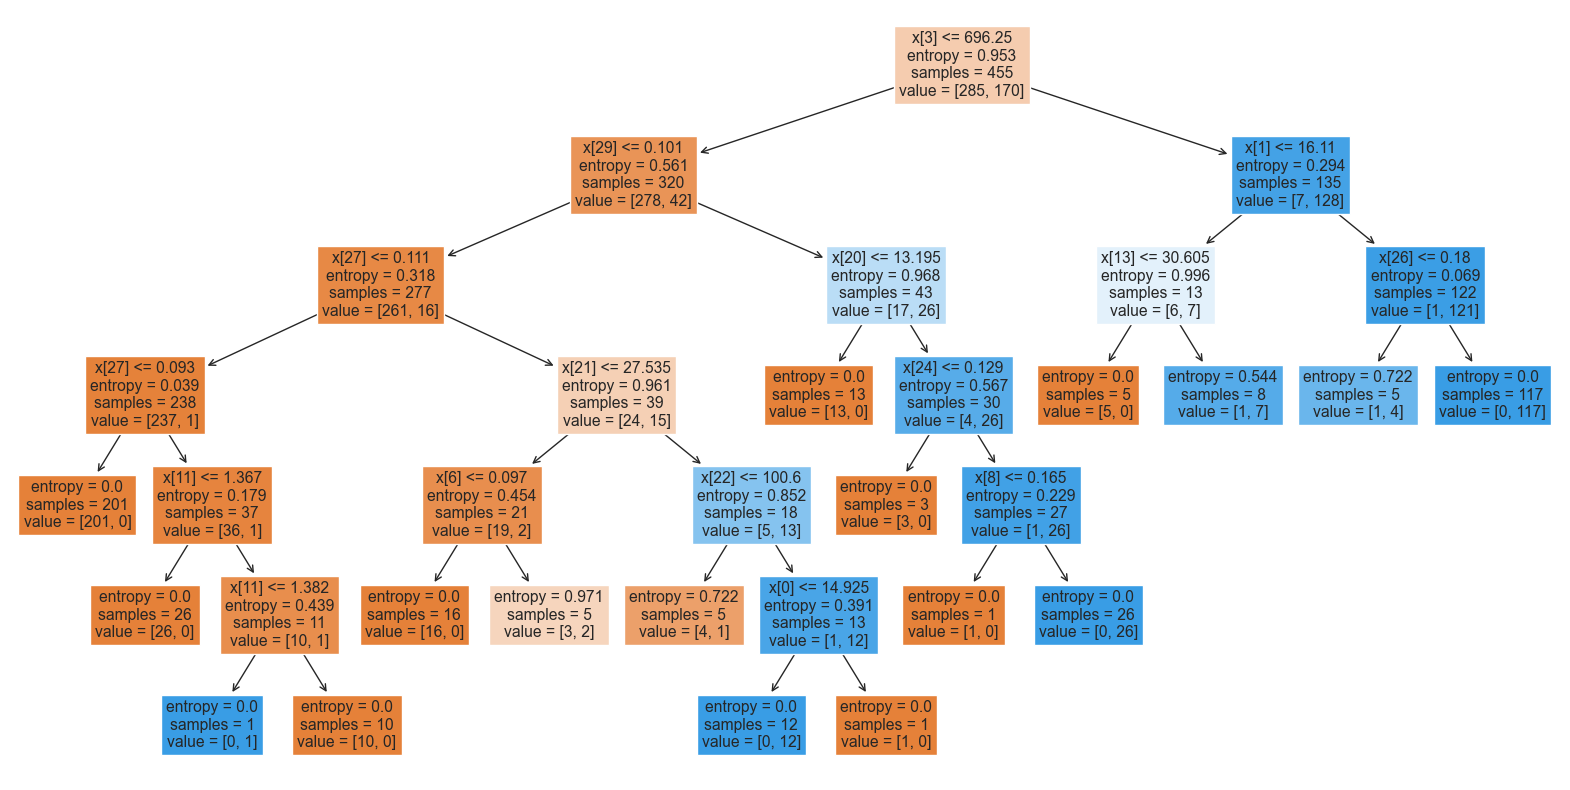

In [23]:
plt.figure(figsize=(20,10))
plot_tree(model_tree, filled=True)
plt.savefig('decision_tree.png')
plt.show()

### Tracé de l'importance des features

In [223]:
# Dataframe Features importances
df_feat2 = pd.DataFrame({'Features' : X_train.columns,
             'Features_importances' : model_tree.feature_importances_})

df_feat2.sort_values(by=['Features_importances'], ascending=False)

,Features,Features_importances
3,area_mean,0.514185
29,fractal_dimension_worst,0.118884
27,concave points_worst,0.105664
20,radius_worst,0.059025
1,texture_mean,0.044100
21,texture_worst,0.030229
24,smoothness_worst,0.025935
13,area_se,0.020595
22,perimeter_worst,0.015927
11,texture_se,0.015891


Text(0, 0.5, 'Feature names')

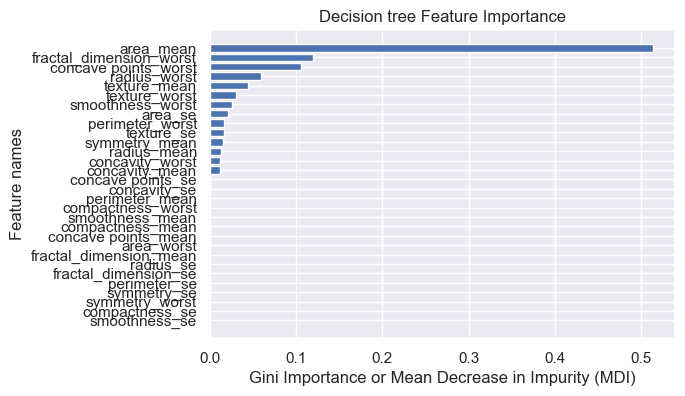

In [224]:
# Plot Features_importances' (Gini importance)
  # Note :Gini importance Mean Decrease in Impurity (MDI) counts the times a feature is used to split a node,
  # weighted by the number of samples it splits
df_feat2.sort_values(by='Features_importances', ascending=True, inplace=True)
plt.figure(figsize=(6, 4))
plt.barh(df_feat2['Features'], df_feat2['Features_importances'])
plt.title("Decision tree Feature Importance")
plt.xlabel('Gini Importance or Mean Decrease in Impurity (MDI)')
plt.ylabel('Feature names')

# II -  Adaboost

###  Entrainement du modele

In [84]:
# Hyperparameter Tuning
    # Remarque : This code takes runs in a long time
# parameters we are fine tuning
# weak_learner = DecisionTreeClassifier(max_depth = 1)

ab_clf = AdaBoostClassifier(random_state=42) # Par défaut base_estimator=weak_learner, donc pas besoin de l'appeler

# Grid Search to Search through all the combination of values
param_grid_ada_clf = {
    'n_estimators': [10, 50, 500, 1000],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1], # 0.0002, 0.002, 0.02, 0.2, 0.0003, 0.003, 0.03, 0.3, ...., 0.0009, 0.009, 0.09, 0.9, 
    'algorithm': ['SAMME', 'SAMME.R']
}

CV_ada_clf = GridSearchCV(estimator=ab_clf, 
                          param_grid=param_grid_ada_clf, 
                          scoring='accuracy', # scoring = ['roc_auc', 'precision', 'f1', ...], il calcule l'accuracy
                          # error_score='raise', # il calcule l'erreur du cv. Il est différent de OOB error
                          # return_train_score=False,
                          cv=5, 
                          verbose=2, 
                          n_jobs=-1)


In [58]:
# Entrainement du modèle
model_ada_clf = CV_ada_clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [60]:
# To view all the parameters used
CV_ada_clf.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [10, 50, 500, 1000]},
             scoring='accuracy', verbose=2)>

In [61]:
# We can view the best parameters from fitting the grid search:
print(CV_ada_clf.best_params_) 

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 1000}


In [ ]:
# print(CV_ada_clf.best_score_) 
# print(CV_ada_clf.cv_results_)

###  Evaluation du modele

In [31]:
# Now let's run the model with this parameters
model_ada = AdaBoostClassifier(n_estimators=1000, learning_rate=1, algorithm='SAMME', random_state=42) # base_estimator=weak_learner,

# Entrainement du modèle d'arbre avec les meilleurs paramètres 
model_ada.fit(X_train, y_train)
# Prédiction avec les données test
y_pred_ada = model_ada.predict(X_test)

# Calcul du score du modèle 
print("Accuracy adaboostclassifier (data test): {:0.2f}%.".format(accuracy_score(y_test, y_pred_ada) * 100))

Accuracy adaboostclassifier (data test): 95.91%.


### Evaluation avec d'autres métriques

In [32]:
# roc = roc_auc_score(y_test, y_pred_ada, pos_label='M')
acc_adaboost = accuracy_score(y_test, y_pred_ada)
prec_adaboost = precision_score(y_test, y_pred_ada, pos_label='M')
rec_adaboost = recall_score(y_test, y_pred_ada, pos_label='M')
f1_adaboost = f1_score(y_test, y_pred_ada, pos_label='M')

model_results_adaboost = pd.DataFrame([['Adaboost', acc_adaboost, prec_adaboost, rec_adaboost, f1_adaboost]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results_adaboost


,Model,Accuracy,Precision,Recall,F1 Score
0,Adaboost,0.959064,0.952381,0.9375,0.944882


### Matrice de confusion

[[104   3]
 [  4  60]]


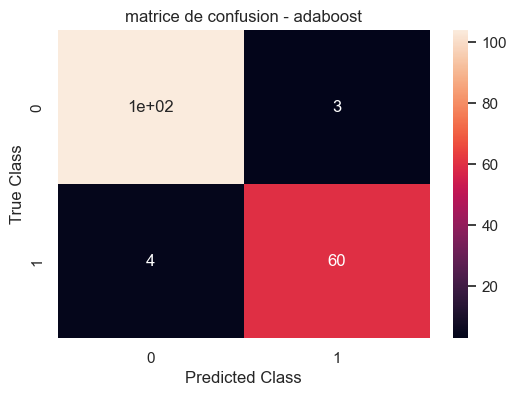

In [78]:
matrix_adaboost = confusion_matrix(y_test, y_pred_ada)
print(matrix_adaboost)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_adaboost, annot=True)
plt.title('matrice de confusion - adaboost')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
#sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')

### Tracé de l'importance des features


In [79]:
# Dataframe Features importances
df_feat_ada = pd.DataFrame({'Features' : X_train.columns,
             'Features_importances' : model_ada.feature_importances_})

df_feat_ada.sort_values(by=['Features_importances'], ascending=False, inplace=True)
df_feat_ada

,Features,Features_importances
26,concavity_worst,0.105010
1,texture_mean,0.084875
13,area_se,0.081136
27,concave points_worst,0.081131
28,symmetry_worst,0.059935
15,compactness_se,0.050312
24,smoothness_worst,0.049561
21,texture_worst,0.049388
8,symmetry_mean,0.047839
5,compactness_mean,0.043042


Text(0, 0.5, 'Feature names')

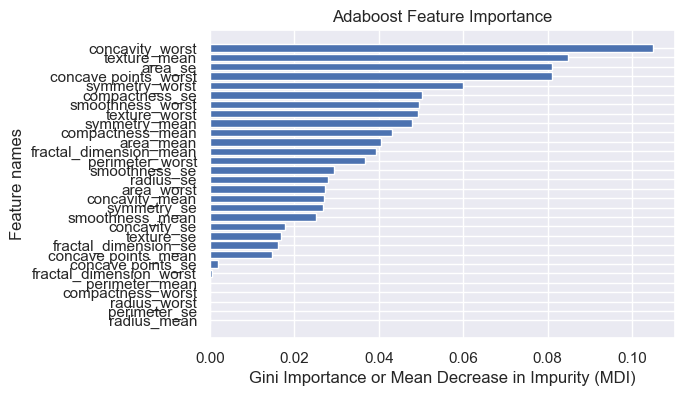

In [81]:
# Plot Features_importances' (Gini importance)
  # Note :Gini importance Mean Decrease in Impurity (MDI) counts the times a feature is used to split a node,
  # weighted by the number of samples it splits
df_feat_ada.sort_values(by='Features_importances', ascending=True, inplace=True)
plt.figure(figsize=(6, 4))
plt.barh(df_feat_ada['Features'], df_feat_ada['Features_importances'])
plt.title("Adaboost Feature Importance")
plt.xlabel('Gini Importance or Mean Decrease in Impurity (MDI)')
plt.ylabel('Feature names')

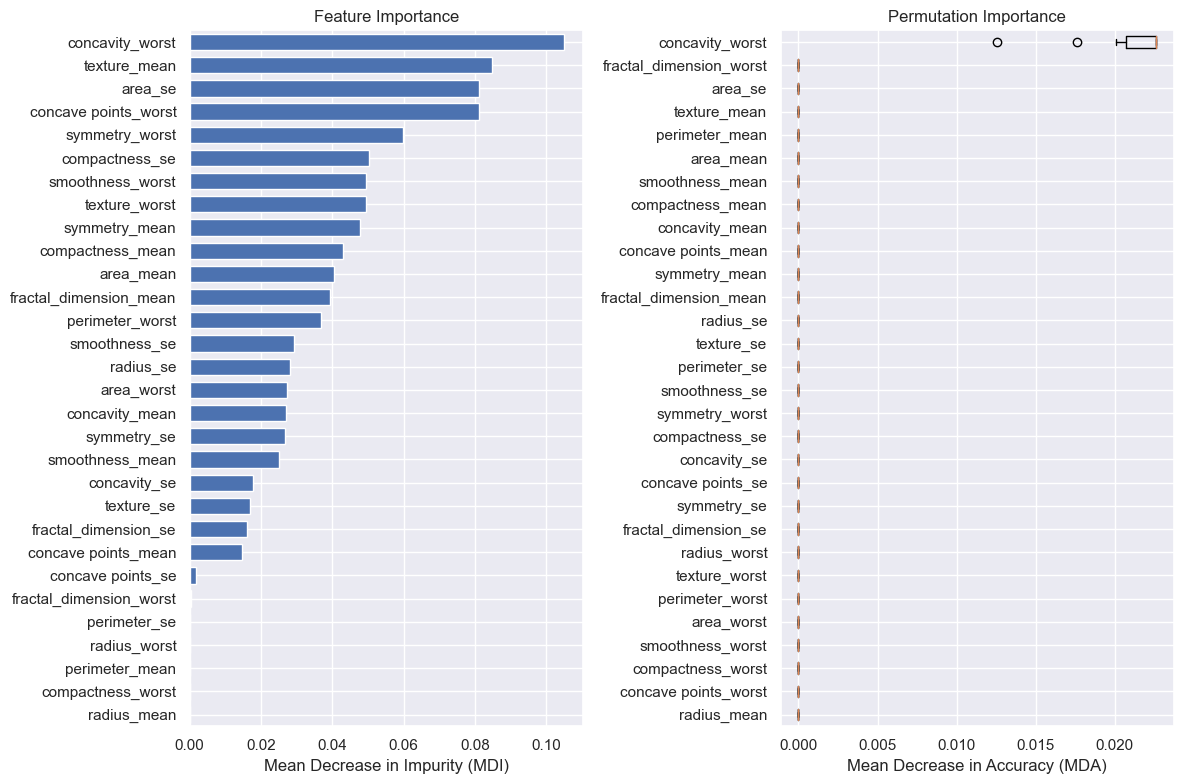

In [82]:
# Feature Importance (MDI) vs Generate Permutation Importance plot
result = permutation_importance(model_ada, X_train, y_train, n_repeats=10, random_state=42)
# n_repeats : Number of times to permute a feature.
perm_sorted_idx = result.importances_mean.argsort()

ada_importance_sorted_idx = np.argsort(model_ada.feature_importances_)
ada_indices = np.arange(0, len(model_ada.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(ada_indices, model_ada.feature_importances_[ada_importance_sorted_idx], height=0.7)
ax1.set_yticks(ada_indices)
ax1.set_yticklabels(X_train.columns[ada_importance_sorted_idx])
ax1.set_ylim((0, len(model_ada.feature_importances_)))
ax1.set_xlabel('Mean Decrease in Impurity (MDI)')
ax1.set_title('Feature Importance')

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_train.columns[perm_sorted_idx])
ax2.set_xlabel('Mean Decrease in Accuracy (MDA)')
ax2.set_title('Permutation Importance')

fig.tight_layout()
plt.show()

# V -  XGBoost Classifier

###  Entrainement du modele

In [24]:
# Hyperparameter Tuning
    # Remarque : This code takes runs in a long time
# parameters we are fine tuning


param_grid_xgb = {
    'n_estimators': [100, 250, 500, 750, 1000],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'colsample_bytree': [1], #[0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bylevel': [1], #[0.5, 0.6, 0.7, 0.8, 0.9, 1],
    #'colsample_bynode':
    #'subsample': [0.8, 0.7, 1],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': range(1,6,2), 
    'reg_lambda': [1], #[0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    'reg_gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
    'reg_alpha': [0]  #[0.1, 0.5, 1]  
    }

xgb = XGBClassifier( # XGBRegressor works also 
    random_state=123, 
    objective='binary:logistic' #binary:logistic –logistic regression for binary classification
    )

# Grid Search to Search through all the combination of values
CV_xgb = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid_xgb, 
    scoring='accuracy', # scoring = ['roc_auc', 'precision', 'f1', ...], il calcule l'accuracy
    error_score='raise', # il calcule l'erreur du cv. Il est différent de OOB error
    return_train_score=False,
    cv=5,
    verbose = 2,
    n_jobs=-1
)

In [34]:
# Transformer la variable sortie (y_train et y_test) en binaire (0, 1) avec 'B'=0 et 'M'=1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

y_test = le.fit_transform(y_test)

In [33]:
# Entrainement du modèle
model_xgb = CV_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
[20:38:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "reg_gamma" } are not used.



In [34]:
# To view all the parameters used
CV_xgb.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=123, ...),
             n_jobs=-1,
             param_grid={'colsample_bylevel': [1], 'colsample_bytree': [1],
    

In [35]:
# We can view the best parameters from fitting the grid search:
print(CV_xgb.best_params_) 

{'colsample_bylevel': 1, 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 250, 'reg_alpha': 0, 'reg_gamma': 0.0, 'reg_lambda': 1}


In [36]:
# print(CV_xgb.best_score_) 
# print(CV_xgb.cv_results_)

###  Evaluation du modele

In [35]:
# Now let's run the model with this parameters
model_xgb = XGBClassifier( # XGBRegressor works also
    n_estimators = 250,
    random_state=123, 
    objective='binary:logistic', #binary:logistic –logistic regression for binary classification
    max_depth=6,
    colsample_bylevel=1, 
    colsample_bytree=1, 
    min_child_weight=3,
    learning_rate=0.1,
    reg_lambda=1, 
    min_split_loss=0.2, # mean gamma
    reg_alpha=0)
                          
# Entrainement du modèle d'arbre avec les meilleurs paramètres 
model_xgb.fit(X_train, y_train)
# Prédiction avec les données test
y_pred_xgb = model_xgb.predict(X_test)

# Calcul du score du modèle 
print("Accuracy xgboostclassifier (data test): {:0.2f}%.".format(accuracy_score(y_test, y_pred_xgb) * 100))


Accuracy xgboostclassifier (data test): 96.49%.


In [36]:
roc_xgb = roc_auc_score(y_test, y_pred_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

model_results_xgb = pd.DataFrame([['Xgboost', acc_xgb, prec_xgb, rec_xgb, f1_xgb, roc_xgb]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
model_results_xgb

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Xgboost,0.964912,0.939394,0.96875,0.953846,0.965683


### Matrice de confusion

[[103   4]
 [  2  62]]


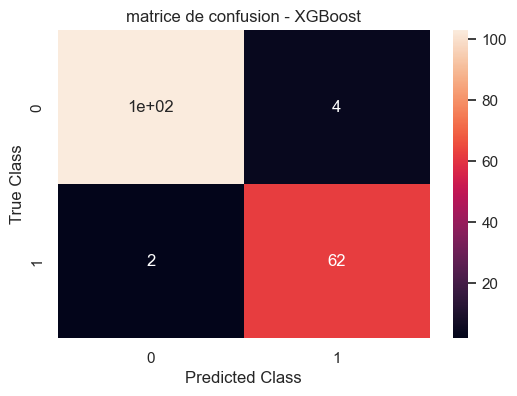

In [40]:
matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(matrix_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_xgb, annot=True)
plt.title('matrice de confusion - XGBoost')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
#sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')

### Tracé de l'importance des features

In [42]:
# Dataframe Features importances
df_feat_xgb = pd.DataFrame({'Features' : X_train.columns,
             'Features_importances' : model_xgb.feature_importances_})

df_feat_xgb.sort_values(by=['Features_importances'], ascending=False, inplace=True)
df_feat_xgb

,Features,Features_importances
27,concave points_worst,0.333966
22,perimeter_worst,0.166212
20,radius_worst,0.134960
23,area_worst,0.083108
26,concavity_worst,0.028632
13,area_se,0.026057
6,concavity_mean,0.024918
21,texture_worst,0.024456
1,texture_mean,0.021438
3,area_mean,0.020937


Text(0, 0.5, 'Feature names')

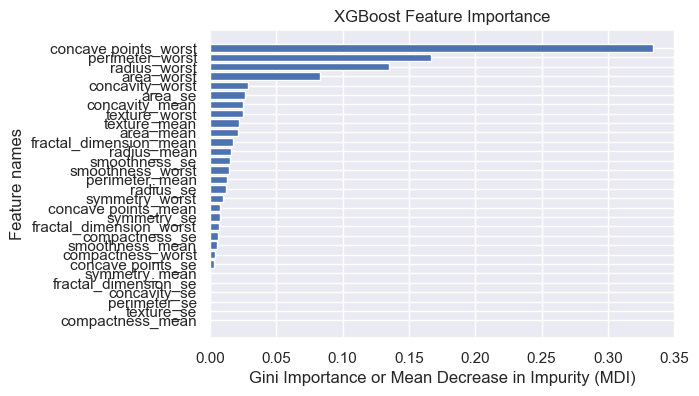

In [43]:
# Plot Features_importances' (Gini importance)
  # Note :Gini importance Mean Decrease in Impurity (MDI) counts the times a feature is used to split a node,
  # weighted by the number of samples it splits
df_feat_xgb.sort_values(by='Features_importances', ascending=True, inplace=True)
plt.figure(figsize=(6, 4))
plt.barh(df_feat_xgb['Features'], df_feat_xgb['Features_importances'])
plt.title("XGBoost Feature Importance")
plt.xlabel('Gini Importance or Mean Decrease in Impurity (MDI)')
plt.ylabel('Feature names')

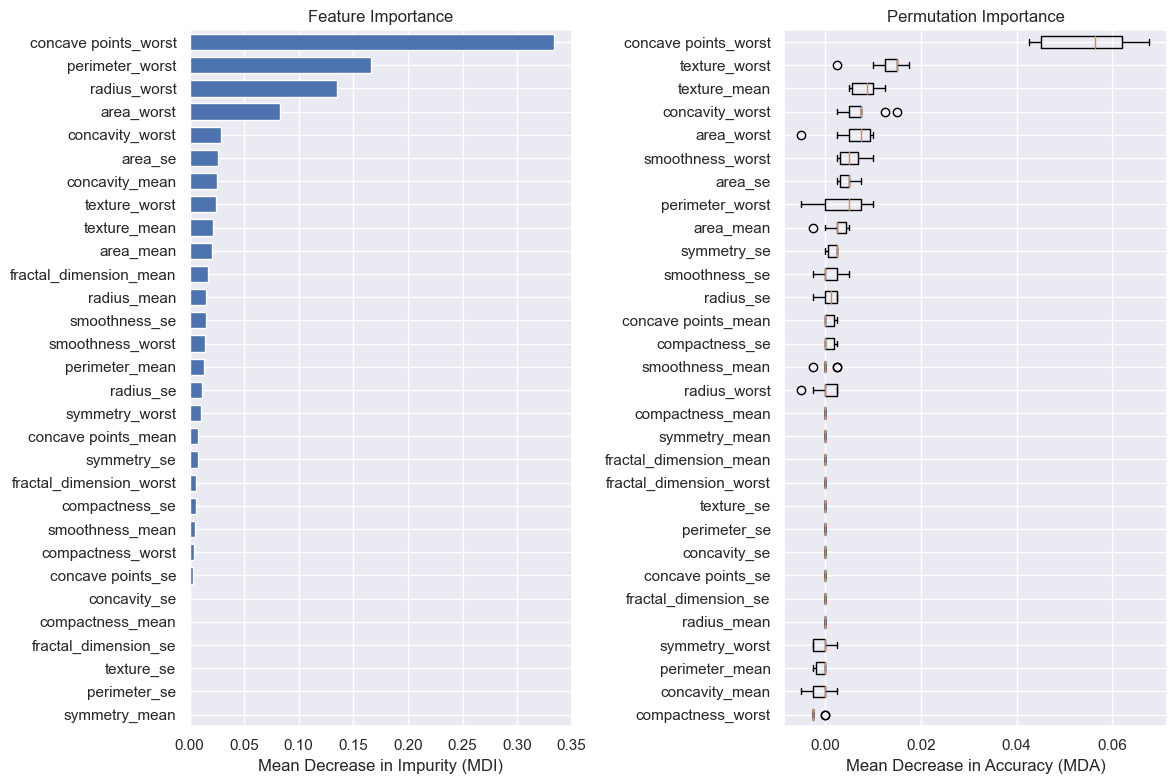

In [45]:
# Feature Importance (MDI) vs Generate Permutation Importance plot
result = permutation_importance(model_xgb, X_train, y_train, n_repeats=10, random_state=42)
# n_repeats : Number of times to permute a feature.
perm_sorted_idx = result.importances_mean.argsort()

xgb_importance_sorted_idx = np.argsort(model_xgb.feature_importances_)
xgb_indices = np.arange(0, len(model_xgb.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(xgb_indices, model_xgb.feature_importances_[xgb_importance_sorted_idx], height=0.7)
ax1.set_yticks(xgb_indices)
ax1.set_yticklabels(X_train.columns[xgb_importance_sorted_idx])
ax1.set_ylim((0, len(model_xgb.feature_importances_)))
ax1.set_xlabel('Mean Decrease in Impurity (MDI)')
ax1.set_title('Feature Importance')

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_train.columns[perm_sorted_idx])
ax2.set_xlabel('Mean Decrease in Accuracy (MDA)')
ax2.set_title('Permutation Importance')

fig.tight_layout()
plt.show()

# VI -  Comparaison des performances des modèles

In [37]:
# score obtenu sur le meme data test avec différents modèles
scores = pd.DataFrame({'modèles': ['Random forest', 'Decision Tree', 'AdaBoost', 'XGBoost'], 
                         'accuracy': [acc_random_forest, acc_decision_tree, acc_adaboost, acc_xgb]})
scores

,modèles,accuracy
0,Random forest,0.959064
1,Decision Tree,0.935673
2,AdaBoost,0.959064
3,XGBoost,0.964912
